### Correlation analysis of main dataset
This experiment serves as a first deeper look into the dataset of game reviews, visualizing the correlation between a number of features (defined as 'keys' in cell 2) for different games (to be specified in the second cell).
The analysis is first done for each game separately, then for the combination of all specified games.

Nikolas Schäfer, December 2023

In [1]:
import json

import pandas as pd
import numpy as np
import sys
sys.path.append('..')

from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib import font_manager
import seaborn as sns
from matplotlib import pyplot as plt

from utils import jasonlines_to_panda_df, generate_sample_df, get_fallout_4_df

[nltk_data] Downloading package wordnet to /home/isi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/isi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
datapath = '../../dat'

keys = ['num_found_funny','review','found_helpful_percentage',
       'num_voted_helpfulness','total_game_hours','rating'] 

#games = ['Arma_3', 'Counter_Strike', 'Counter_Strike_Global_Offensive', 'Dota_2', 'Football_Manager_2015', 
#         'Garrys_Mod', 'Grand_Theft_Auto_V', 'Sid_Meiers_Civilization_5', 'Team_Fortress_2',
#         'The_Elder_Scrolls_V', 'Warframe']

games = ['Arma_3', 'Counter_Strike', 'The_Elder_Scrolls_V']

dfs = {}
for game in games:
    df = jasonlines_to_panda_df(f'{datapath}/{game}.jsonlines', keys)
    dfs.update({game:df})

combined_df = pd.concat(dfs.values()) 
combined_df

,num_found_funny,review,found_helpful_percentage,num_voted_helpfulness,total_game_hours,rating
0,1,My first game on A3 brought me the most horrif...,0.948103,4875,580.3,1
1,1,This is not a game for people who want fast ac...,0.947903,3743,122.2,1
2,1,Oh man. Where to even begin with this one. It ...,0.957048,1653,731.4,1
3,1,This is quite possibly the most emotional shoo...,0.928828,1391,291.8,1
4,1,"If you have friends, this is a great game to p...",0.883284,5055,46.8,1
...,...,...,...,...,...,...
7160,0,"""Like Skyrim with guns!"" 10/10 IGN.",0.750000,4,283.9,1
7161,1,you can kill dragons and get high on sugar,0.750000,4,96.8,1
7162,0,Enjoy hundreds upon hundreds of copy-pasted du...,0.750000,4,118.3,1
7163,1,You get to dragons in the unprotected then y...,0.750000,4,6.1,1


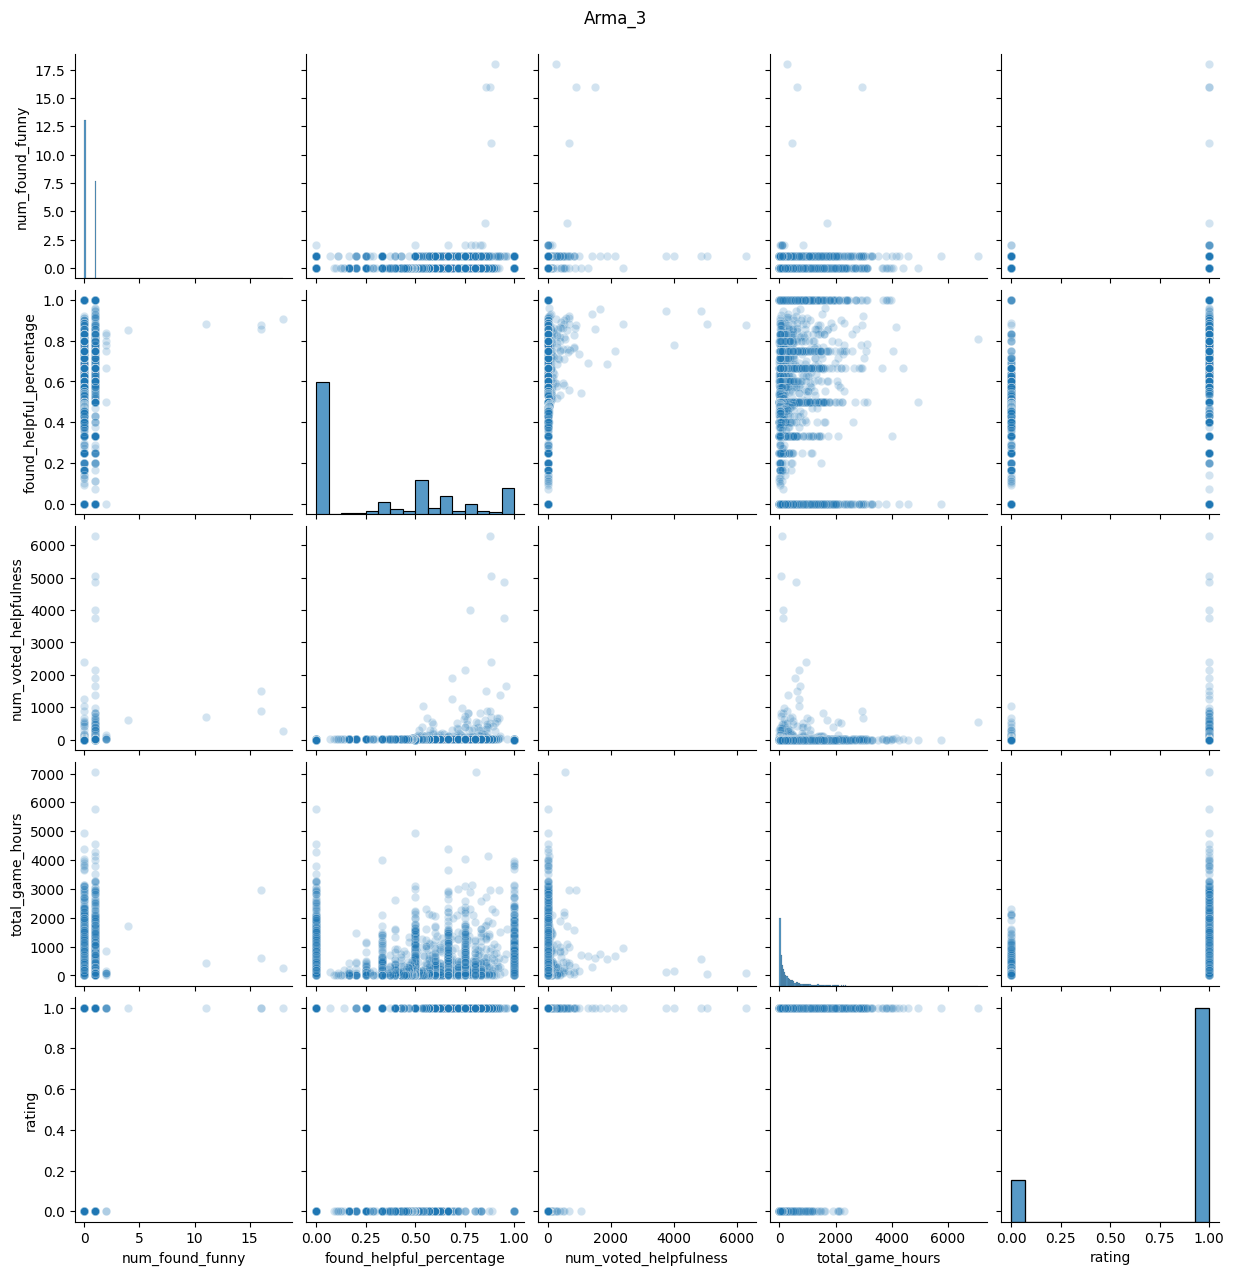

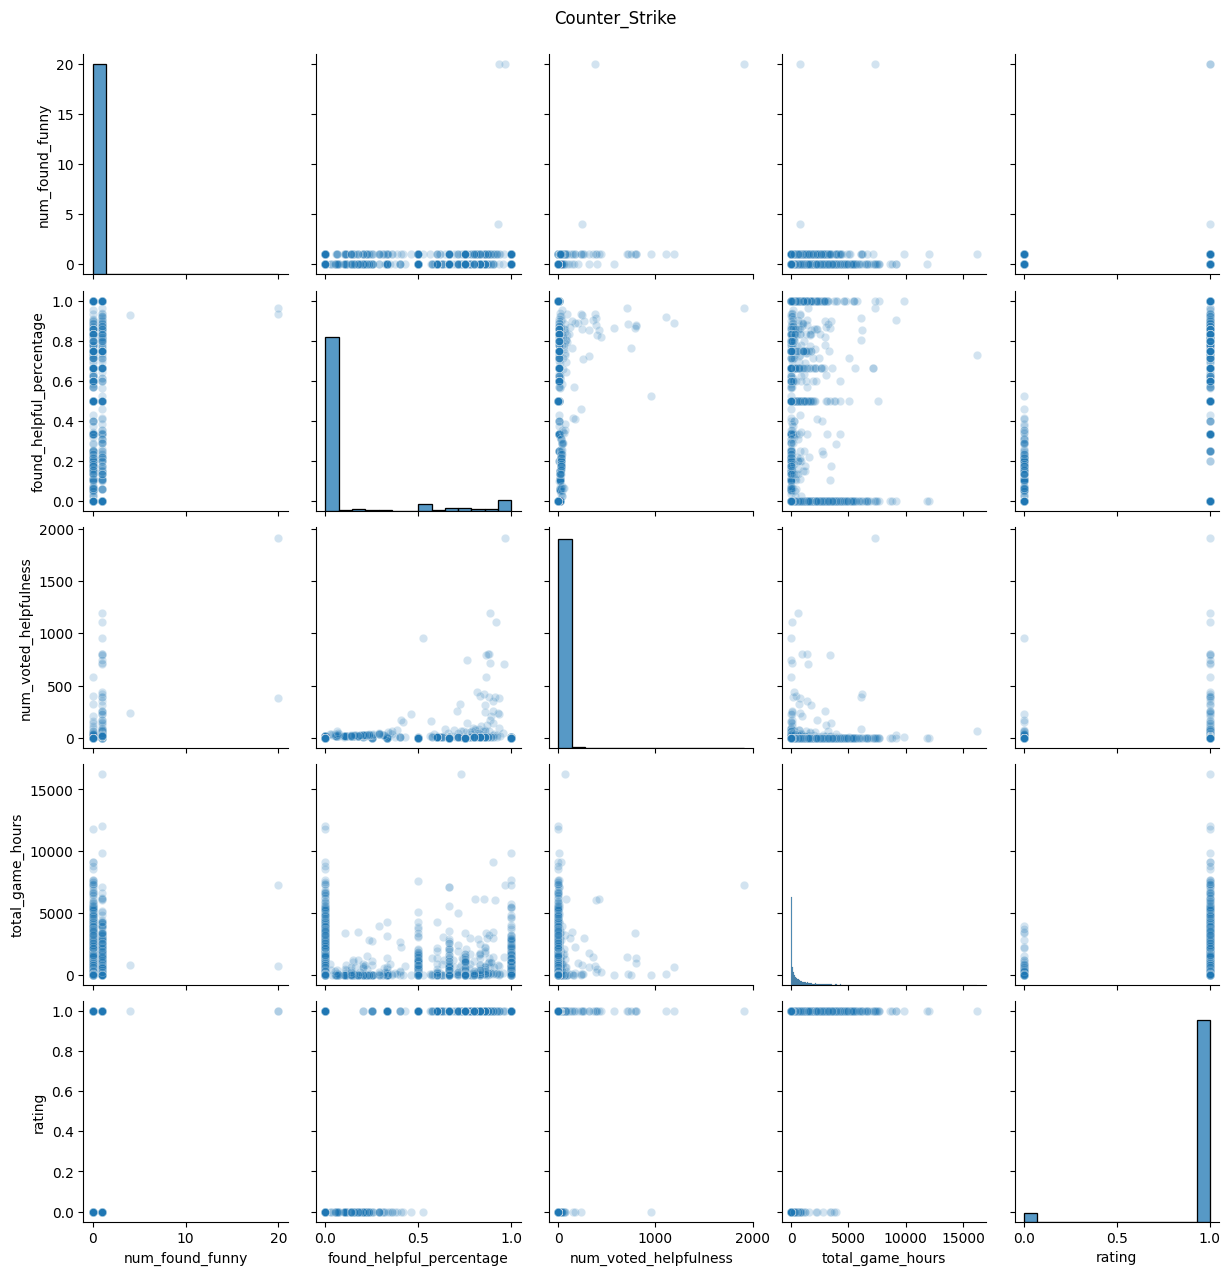

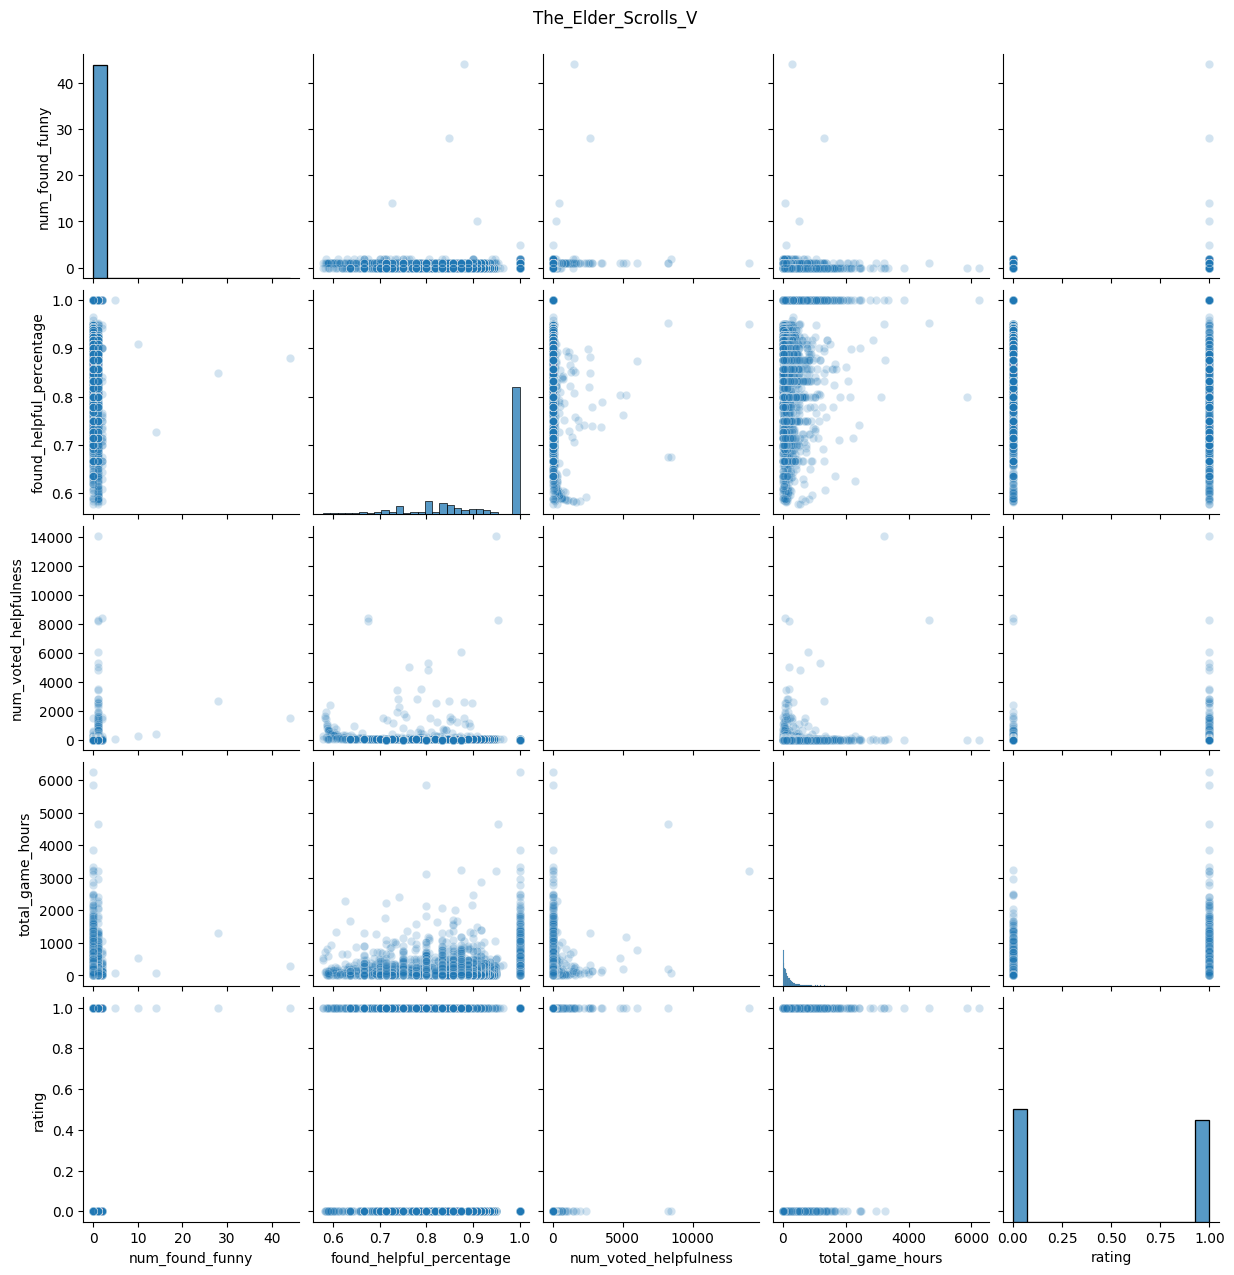

In [3]:
for game in dfs.keys():
    ax = sns.pairplot(dfs[game], diag_kind="hist", plot_kws=dict(alpha=0.2))
    ax.fig.suptitle(game, y=1.02)
    plt.savefig(f"out/{game}_pairplot.png")
    

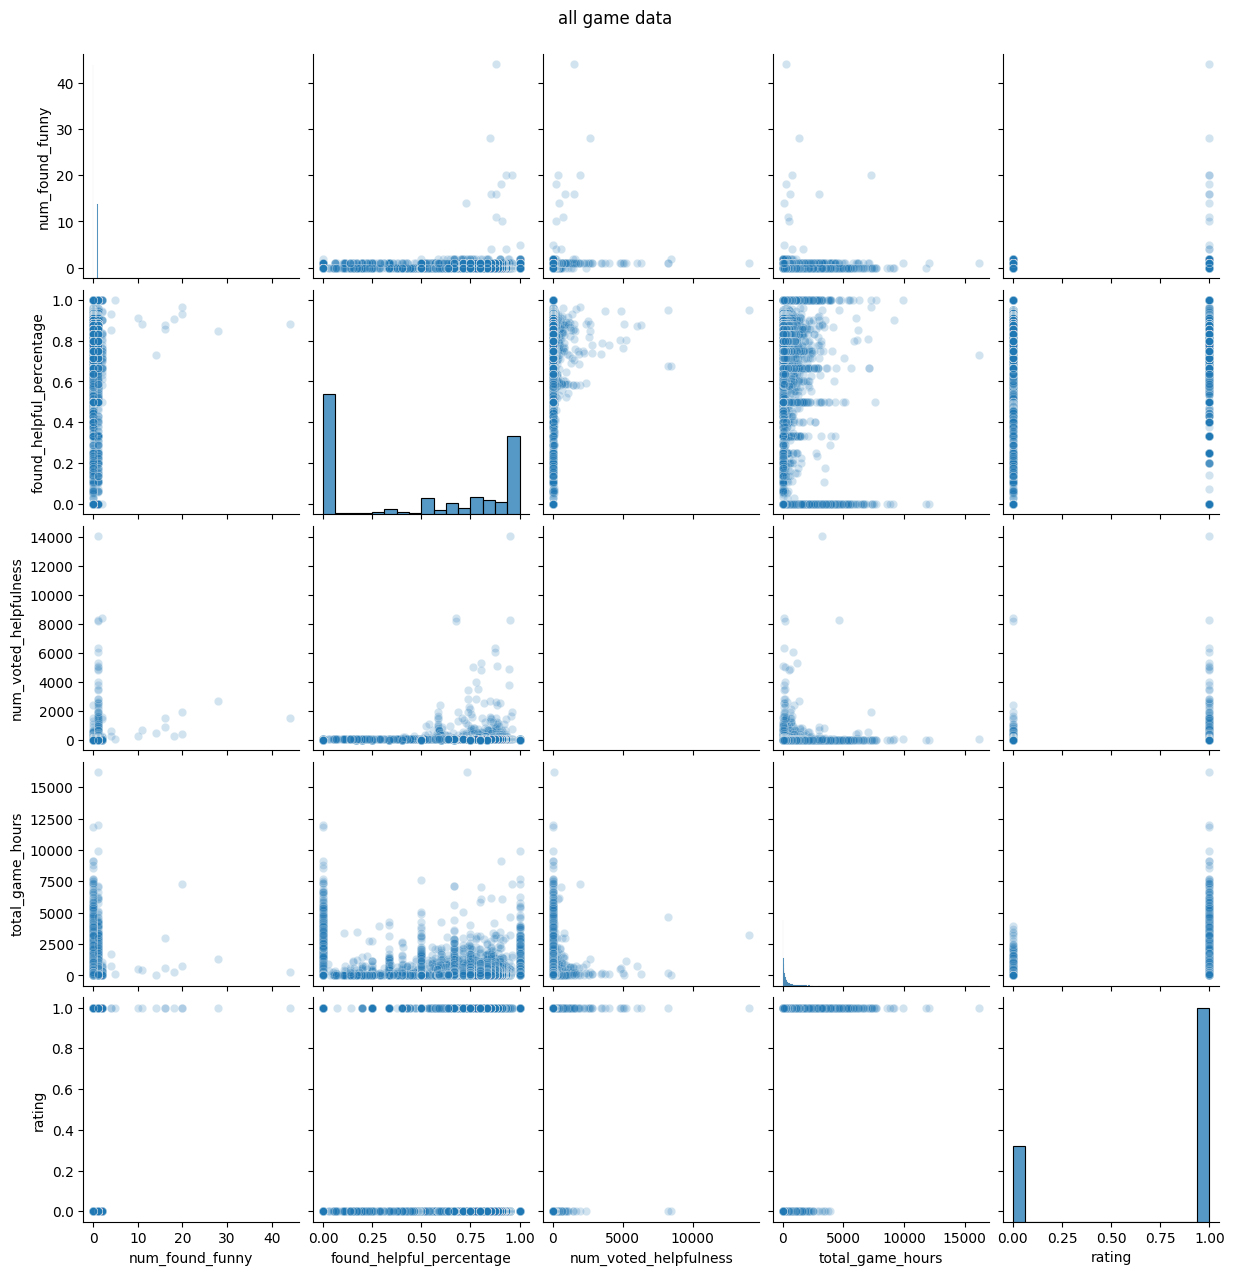

In [4]:
ax = sns.pairplot(combined_df, diag_kind="hist", plot_kws=dict(alpha=0.2))
ax.fig.suptitle("all game data", y=1.02)
plt.savefig(f"out/all_games_pairplot.png")

In [5]:
arma_3 = []
with open(f'{datapath}/Arma_3.jsonlines') as f:
    for line in f:
        arma_3.append(json.loads(line))
        
f.close()

for key in arma_3[102].keys():
    dat = arma_3[102][key]
    print(f'{key}: {dat}')
    print(type(dat))
    print('\n')

total_game_hours_last_two_weeks: 0.0
<class 'float'>


num_groups: 6
<class 'int'>


orig_url: http://steamcommunity.com/app/107410/homecontent/?userreviewsoffset=100&p=1&itemspage=11&screenshotspage=11&videospage=11&artpage=11&allguidepage=11&webguidepage=11&integratedguidepage=11&discussionspage=11&appid=107410&appHubSubSection=10&appHubSubSection=10&l=english&browsefilter=toprated&filterLanguage=default&searchText=&forceanon=1
<class 'str'>


num_badges: 6
<class 'int'>


review_url: http://steamcommunity.com/id/shotbygun/recommended/107410/
<class 'str'>


num_found_funny: 1
<class 'int'>


review: Pros: - Most wide maps of any shooting game that I have played. - Mods really make arma - Modding community is really good - Powerful map editor and scripting language Cons: - Really badly implemented multi-threading resulting in horrible performance - Inconsistent and buggy scripting language with many flaws. - Netcode is still not very stable - Game and mods require approximately 100GB